# 데이터 정의

In [12]:
import numpy as np

loaded_data = np.loadtxt('/content/LEC06_TrainData.csv', delimiter=',')

x_train_np = loaded_data[ : , 0:-1]

y_train_np = loaded_data[ : , [-1]]

print(loaded_data[:3])
print('========================')
print(x_train_np[:3])
print('========================')
print(y_train_np[:3])

[[ 1.  2.  0. -4.]
 [ 5.  4.  3.  4.]
 [ 1.  2. -1. -6.]]
[[ 1.  2.  0.]
 [ 5.  4.  3.]
 [ 1.  2. -1.]]
[[-4.]
 [ 4.]
 [-6.]]


In [13]:
import torch
from torch import nn

x_train = torch.Tensor(x_train_np)
y_train = torch.Tensor(y_train_np)

# 신경망 모델 구축

In [14]:
from torch import nn

class MyLinearRegressionModel(nn.Module):

    def __init__(self, input_nodes):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(input_nodes, 1)
        )

    def forward(self, data):
        prediction = self.linear_stack(data)

        return prediction

In [16]:
model = MyLinearRegressionModel(3)

for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

linear_stack Parameter containing:
tensor([[-0.5557, -0.4701,  0.2213]], requires_grad=True)
linear_stack Parameter containing:
tensor([0.1274], requires_grad=True)


# 손실함수 및 옵티마이저 설정

In [17]:
loss_function = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

In [19]:
loss_list = []
nums_epoch = 2000

for epoch in range(nums_epoch+1):

    prediction = model(x_train)
    loss = loss_function(prediction, y_train)

    loss_list.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('epoch = ', epoch, ' current loss = ', loss.item())

epoch =  0  current loss =  30.434534072875977
epoch =  100  current loss =  0.14840154349803925
epoch =  200  current loss =  0.0038056843914091587
epoch =  300  current loss =  0.0009224975947290659
epoch =  400  current loss =  0.0003088385856244713
epoch =  500  current loss =  0.00010432893759571016
epoch =  600  current loss =  3.5250381188234314e-05
epoch =  700  current loss =  1.1910577995877247e-05
epoch =  800  current loss =  4.025009275210323e-06
epoch =  900  current loss =  1.3602905255538644e-06
epoch =  1000  current loss =  4.5975266971254314e-07
epoch =  1100  current loss =  1.5563774979909795e-07
epoch =  1200  current loss =  5.26675769663143e-08
epoch =  1300  current loss =  1.7907071381273454e-08
epoch =  1400  current loss =  6.038336053393323e-09
epoch =  1500  current loss =  2.053691883219244e-09
epoch =  1600  current loss =  7.262540013819319e-10
epoch =  1700  current loss =  2.730672354900321e-10
epoch =  1800  current loss =  1.1043591041648426e-10
epo

In [20]:
for name, child in model.named_children():
    for param in child.parameters():
        print(name, param)

linear_stack Parameter containing:
tensor([[ 2.0000, -3.0000,  2.0000]], requires_grad=True)
linear_stack Parameter containing:
tensor([9.3510e-06], requires_grad=True)


In [21]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 2.0000, -3.0000,  2.0000]], requires_grad=True)
Parameter containing:
tensor([9.3510e-06], requires_grad=True)


# 테스트 데이터 예측

In [22]:
x_test = torch.Tensor([ [5, 5, 0], [2, 3, 1], [-1, 0, -1], [10, 5, 2], [4, -1, -2] ])

label = [ 2*data[0] -3*data[1] + 2*data[2]  for data in x_test ]

pred = model(x_test)

print(pred)
print('=============================================')
print(label)

tensor([[-5.0000],
        [-3.0000],
        [-4.0000],
        [ 9.0000],
        [ 7.0000]], grad_fn=<AddmmBackward0>)
[tensor(-5.), tensor(-3.), tensor(-4.), tensor(9.), tensor(7.)]


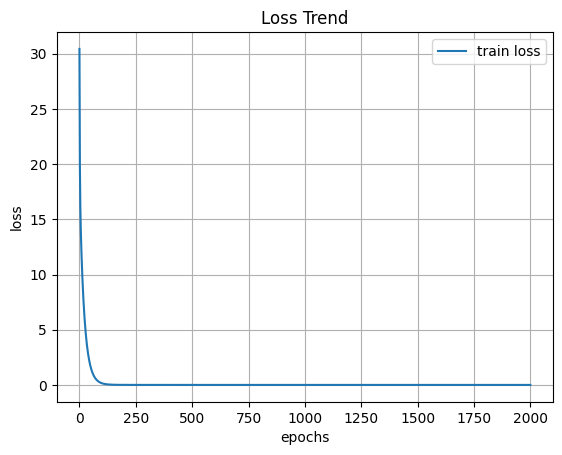

In [23]:
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(loss_list, label='train loss')
plt.legend(loc='best')

plt.show()